# Wine Point Prediction Analysis 
## MSCA 31008 Course Project 

In [42]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from scipy import stats, integrate
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('clean_wine_dataset.csv')

In [3]:
wine

,description,designation,points,price,province,variety,winery
0,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
1,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
2,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
3,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
4,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
...,...,...,...,...,...,...,...
152256,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
152257,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Pinot Noir,Citation
152258,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Gewürztraminer,Domaine Gresser
152259,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Pinot Gris,Domaine Marcel Deiss


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152261 entries, 0 to 152260
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   description  152261 non-null  object 
 1   designation  106521 non-null  object 
 2   points       152261 non-null  int64  
 3   price        152261 non-null  float64
 4   province     152261 non-null  object 
 5   variety      152261 non-null  object 
 6   winery       152261 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB


In [5]:
wine["points"].describe()

count    152261.000000
mean         88.061651
std           3.061179
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [6]:
def sentiment_label(x):
    if x <= 83:
        return 'negative'
    elif x>= 90:
        return 'positive'
    else:
        return 'neutral'

def sentiment_score(x):
    if x <= 83:
        return 0
    elif x>= 90:
        return 1
    else:
        return 2

In [7]:
wine['sentiment_score'] = wine.points.apply(lambda x: sentiment_score(x))

In [8]:
todummies = ['province','variety']
dummies = pd.get_dummies(wine[todummies])
winetrain = pd.concat([dummies,wine],axis=1)

In [9]:
winetrain = winetrain.drop(['designation'], axis=1)
winetrain = winetrain.drop(['province'], axis=1)
winetrain = winetrain.drop(['variety'], axis=1)
winetrain = winetrain.drop(['winery'], axis=1)

In [10]:
winetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152261 entries, 0 to 152260
Columns: 1221 entries, province_Achaia to sentiment_score
dtypes: float64(1), int64(2), object(1), uint8(1217)
memory usage: 181.4+ MB


In [11]:
winetrain = winetrain.drop(['description'], axis=1)

### Fitting Preliminary Models: 

In [12]:
X,y=winetrain.drop(['points'],axis=1),winetrain['points']

In [13]:
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

In [14]:
def RegressorFit(model): 
    Regressor = model()
    Regressor.fit(train_X, train_y)
    Regressor.predict(val_X)
    return Regressor

#### Linear Regression: 

In [15]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

-2.9556855572088556e+16 percent


#### Decision Tree:

In [16]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

77.24  percent


#### Random Forest:

In [17]:
forest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

79.3  percent


#### KNeighbors Regressor:

In [18]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

70.23  percent


In [19]:
y_pred = forest.predict(val_X)

mse_forest = MSE(val_y, y_pred)

rmse_forest = mse_forest**(1/2)

print("Test set RMSE of the forest model is: {:.2f}".format(rmse_forest))

Test set RMSE of the forest model is: 1.39


##### Selecting Hyperparameters Via Randomized Search CV: 

In [33]:
forest_2 = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RandomForestCV = RandomizedSearchCV(forest_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

RandomForestCV.fit(train_X, train_y)
RandomForestCV.best_params_



Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [34]:
rs_df = pd.DataFrame(RandomForestCV.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,600,23,2,sqrt,15,False,0.385887,1
1,400,23,2,sqrt,14,False,0.370599,2
2,700,12,2,sqrt,13,False,0.360840,3
3,100,2,18,sqrt,15,False,0.355692,4
4,800,28,12,sqrt,14,True,0.354218,5
5,100,50,39,sqrt,15,False,0.349511,6
6,1000,34,23,sqrt,14,True,0.346810,7
7,600,50,23,sqrt,14,False,0.346414,8
8,300,18,18,sqrt,13,True,0.342096,9
9,500,12,18,sqrt,13,False,0.334865,10


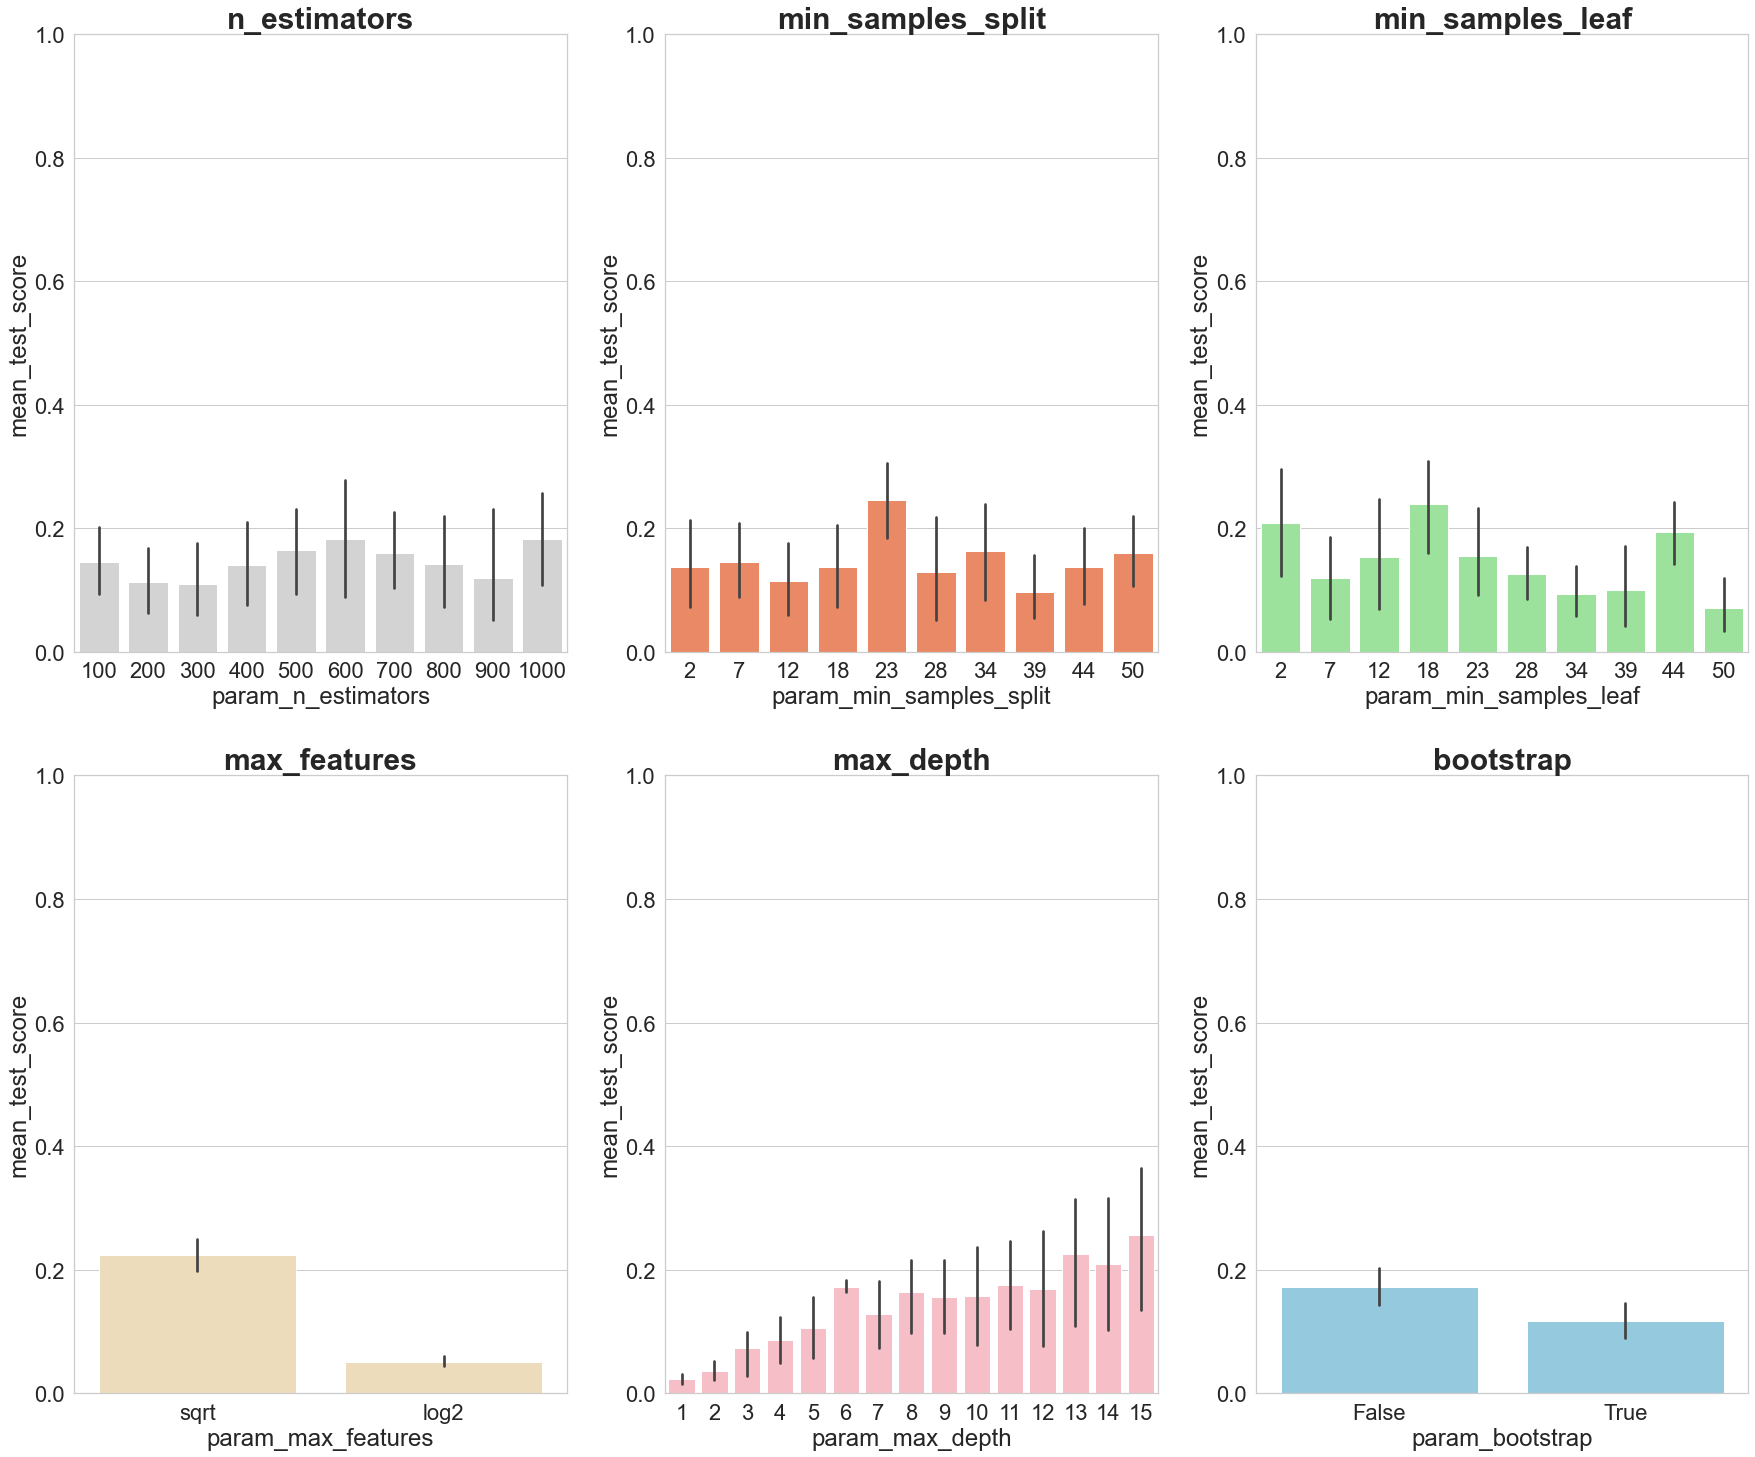

In [39]:
fig, axs = plt.subplots(ncols=3, nrows=2)

sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([0,1])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([0,1])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([0,1])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([0,1])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([0,1])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([0,1])

axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

plt.show()

##### Ensemble: 

In [30]:
gb = GradientBoostingRegressor()

gb.fit(train_X, train_y)

y_pred_Gboost = gb.predict(val_X)

y_pred_train=gb.predict(train_X)

rmse_test = MSE(val_y, y_pred_Gboost)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

acc_GradientBoostingRegressor = round(gb.score(val_X, val_y) * 100, 2)
print(round(acc_GradientBoostingRegressor,2,), ' percent')

Test set RMSE of gb: 1.35
Train set RMSE of gb: 1.36
80.4  percent


In [31]:
gb = GradientBoostingRegressor(random_state=1)

rf = RandomForestRegressor(random_state=1)

dt = DecisionTreeRegressor(random_state=1)

regressors = [('Gradient Boosting Regressor', gb), ('Decision Tree', dt),('Random Forest',rf)]

In [36]:
vc = VotingRegressor(estimators=regressors)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingRegressor = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingRegressor,2,), ' percent')

Test set RMSE of VC: 1.36
Train set RMSE of VC: 1.18
Voting Regressor: 80.14  percent


In [37]:
KNN = KNeighborsRegressor()

rf = RandomForestRegressor(random_state=1)

dt = DecisionTreeRegressor(random_state=1)

regressors = [('K Neighbors Regressor', KNN), ('Decision Tree', dt),('Random Forest',rf)]

In [38]:
vc = VotingRegressor(estimators=regressors)     

vc.fit(train_X, train_y)   

y_pred = vc.predict(val_X)

y_pred_train=vc.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingRegressor2 = round(vc.score(val_X, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingRegressor2,2,), ' percent')

Test set RMSE of VC: 1.42
Train set RMSE of VC: 1.20
Voting Regressor: 78.34  percent


In [32]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

regr.fit(train_X, train_y)

y_pred = regr.predict(val_X)

y_pred_train=regr.predict(train_X)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)

print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_AdaBoostRegressor = round(regr.score(val_X, val_y) * 100, 2)
print('AdaBoost Regressor:',round(acc_AdaBoostRegressor,2,), ' percent')

Test set RMSE of VC: 1.42
Train set RMSE of VC: 1.43
AdaBoost Regressor: 78.25  percent


#### Model Comparison:

In [44]:
models = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Decision Tree','Random Forest', 
              'KNN','Gradient Boosting Regressor', 'VotingRegressor (Gradient Boosting Regressor, Decision Tree and Random Forest)', 
              'VotingRegressor (KNN, Decision Tree and Random Forest)', 'AdaBoost Regressor'],
    
    'Score': [acc_lin_reg, acc_decision_tree,acc_random_forest, 
              acc_KNN, acc_GradientBoostingRegressor, acc_VotingRegressor, 
              acc_VotingRegressor2, acc_AdaBoostRegressor]
    })
models['Score'] = pd.Series(["{0:.2f}%".format(val) for val in models['Score']], index = models.index)
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradient Boosting Regressor,80.40%
5,"VotingRegressor (Gradient Boosting Regressor, ...",80.14%
2,Random Forest,79.30%
6,"VotingRegressor (KNN, Decision Tree and Random...",78.34%
7,AdaBoost Regressor,78.25%
1,Decision Tree,77.24%
3,KNN,70.23%
0,Simple Linear Regression,-29556855572088556.00%


In [46]:
X,y=winetrain.drop(['points'],axis=1),winetrain['points']
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

y_pred = gb.predict(val_X)
predictions_df = pd.DataFrame(y_pred, columns = ["yhat"])
predictions_df["y"] = val_y.values
predictions_df.head()

,yhat,y
0,86.069985,84
1,91.209690,90
2,82.346693,82
3,91.479575,95
4,87.006749,88


We began this analysis by first loading the required packages and the dataset, as cleaned via the EDA code provided in the attached preliminary workbook. We then explored the data to gain a better understanding of the relationships between the points and other features. Consistent with our team’s sentiment analysis we assign sentiment labels to each wine based on its points (i.e., less than 83: “negative”, 83-90: “neutral”, and greater than 90: “positive”). We assign the sentiment score in order to reflect a scenario in which our sentiment analysis accurately predicts the sentiment of the wine’s description as we lacked an additional dataset for full testing of our methodologies. We then assigned dummy variables to “province” and “variety” and dropped “designation” and “winery”. We chose these features as “province” and “variety” reflect the type of wine and location where the grapes for the wine were grown. We selected “province” and “variety” to test the notion that type of wine and location are two of the biggest features of quality wine.  We dropped “designation” and “winery” as “designation” was redundant with “variety” and “winery” was too specific to the point where many wineries from the training and test split only contributed one wine. As such, our model could not learn from or predict these wines. 


We then fit our preliminary models in order to gain a base level understanding of which models fit better than others. A shown, DecisionTreeRegressor, RandomForestRegressor, and KneighborsRegressor fit best with accuracies of 77.24%, 79.30%, and 70.23%, respectively. Based thereon, we moved to select hyperparameters via RandomsSarchCV for RandomForestRegressor. As shown, our original random forest model which was split until the nodes were pure performed significantly better than the hyperparameter models. 


After attempting to improve our analysis via hyperparameters, we moved to explore alternative ensemble models such as GradientBoostingRegressor, VotingRegressor, and AdaBoost.  In total we fit four ensemble models: GradientBoostingRegressor, VotingRegressor (GradientBoostingRegressor, DecisionTreeRegressor, and RandomForestRegressor), VotingRegressor (KneighborsRegressor, DecisionTreeRegressor, and RandomForestRegressor) and AdaBoost. As shown, GradientBoostingRegressor performed the best with an accuracy, as measured by r-squared, of 80.4 with test and train RMSEs of 1.35 and 1.36, respectively. 


As shown in the comparison of models above, GradientBoostingRegressor had the overall best fit, as measured by r-squared. As such, we leveraged this model to predict the points for the test set, shown above.

